#**COVID-19 Peaks**
Team Members: Patricia Angelica, Jun Wu, & Maria Alonso Ureno
<img src="https://www.coe.int/documents/10518249/88399762/Covid-Vaccine/23edacee-ac47-953e-7c8d-012ec176c157" width=660>

## Introduction
The data reported is recorded between April 2021 thru September 2022 in which investigates several variables in regards to COVID-19. Our main focus will explore the variables that includes age, cases with vaccination, and specifically the recorded outcome of COVID-19 through this time period. One of our main questions includes whether the number of cases of COVID-19 vary based on age when given the vaccine. Our second focus will involve whether the rate of COVID-19 remains constant through the period of April 2021 thru September 2022. We will use statistical approaches to answer these questions.




### In a more statical format these are our Hypotheses:

Case 1:

$H_{0}:$ The number of  COVID-19 cases for vaccinated youth and elder are the same.

$H_{a}:$ The number of  COVID-19 cases for vaccinated youth and elder are different.

Case 2:

$H_{0}:$ There is no correlation between date and outcome of COVID-19.   
$H_{a}:$ There is a correlation between date and outcome of COVID-19.

## Data

Note this is a decription of the data set given to us:

Note of Vaccination status: A person vaccinated with a primary series had SARS-CoV-2 RNA or antigen detected on a respiratory specimen collected ≥14 days after verifiably completing the primary series of an FDA-authorized or approved COVID-19 vaccine. An unvaccinated person had SARS-CoV-2 RNA or antigen detected on a respiratory specimen and has not been verified to have received COVID-19 vaccine.

Here are the descriptions of the dataset:

- `outcome`: COVID-19 Case or Death
- `month`: Calendar month and year corresponding to MMWR week value [MMM YYYY format; e.g.APR 2021]
- `MMWR week`: MMWR epidemiological year and week [YYYYWW format; e.g. 202101]
- `Age group`: Age Group [0-4 years; 5-1 years; 12-17 years; 18-29 years; 30-49 years; 50-64 years; 65-79 years; 80+ years]
- `Vaccinated with outcome`: Weekly count of individuals vaccinated with at least a primary series with the corresponding outcome
- `Unvaccinated with outcome`: Weekly count of unvaccinated individuals with the corresponding outcome
- `Crude vax IR`: Unadjusted incidence rate of the corresponding outcome among the population vaccinated with at least a primary series (per 100,000 population)
- `Crude unvax IR`: Unadjusted incidence rate of the corresponding outcome among the unvaccinated population (per 100,000 population)


This is the data set in which we will be analyzing:

- Age group: The age groups that we will be anaylzing includes the groups 12-17, 18-29, and 30-49.

- Cases: We narrowed down the number of cases for a total number to be 231, where each age group consists of 77 individuals.

- Period/Time: Each month and corresponding year is taken in consideration based on each case, in addition year and week is also taken consideration when taking the analysis.



In [ ]:
import pandas as pd
data_url = 'https://raw.githubusercontent.com/csbfx/cs22a/main/covid19_rate_by_vaccine.csv'

df = pd.read_csv(data_url)
df

,outcome,month,MMWR week,Age group,Vaccinated with outcome,Unvaccinated with outcome,Crude vax IR,Crude unvax IR
0,case,APR 2021,202114,12-17,8,30785,21.687858,175.348491
1,case,APR 2021,202114,18-29,671,76736,26.385193,246.808299
2,case,APR 2021,202114,30-49,1837,98436,24.729400,239.653115
3,case,APR 2021,202114,50-64,1547,50324,20.661256,219.290266
4,case,APR 2021,202114,65-79,1655,14880,11.494573,193.852934
...,...,...,...,...,...,...,...,...
982,death,AUG 2022,202235,18-29,2,1,0.009043,0.008873
983,death,AUG 2022,202235,30-49,11,18,0.027152,0.147408
984,death,AUG 2022,202235,50-64,46,67,0.138830,1.113800
985,death,AUG 2022,202235,65-79,201,140,0.819404,7.364142


This contains the raw data in which we explore information given to us as a form to gather information and make assumptions.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   outcome                    987 non-null    object 
 1   month                      987 non-null    object 
 2   MMWR week                  987 non-null    int64  
 3   Age group                  987 non-null    object 
 4   Vaccinated with outcome    987 non-null    int64  
 5   Unvaccinated with outcome  987 non-null    int64  
 6   Crude vax IR               987 non-null    float64
 7   Crude unvax IR             987 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 61.8+ KB


In [ ]:
df.describe()

,MMWR week,Vaccinated with outcome,Unvaccinated with outcome,Crude vax IR,Crude unvax IR
count,987.000000,987.000000,987.000000,987.000000,987.000000
mean,202177.553191,17898.483283,21410.437690,83.577826,250.564257
std,44.127075,52818.106848,51811.894393,205.211041,495.051246
min,202114.000000,0.000000,0.000000,0.000000,0.000000
25%,202134.000000,24.000000,101.500000,0.094829,1.240965
50%,202202.000000,761.000000,2556.000000,8.077607,63.540253
75%,202219.000000,15459.000000,19818.500000,93.781898,320.652970
max,202238.000000,696702.000000,587396.000000,2056.516011,3991.947275


With the information described here, there was an average of 987 cases and deaths recorded per week.

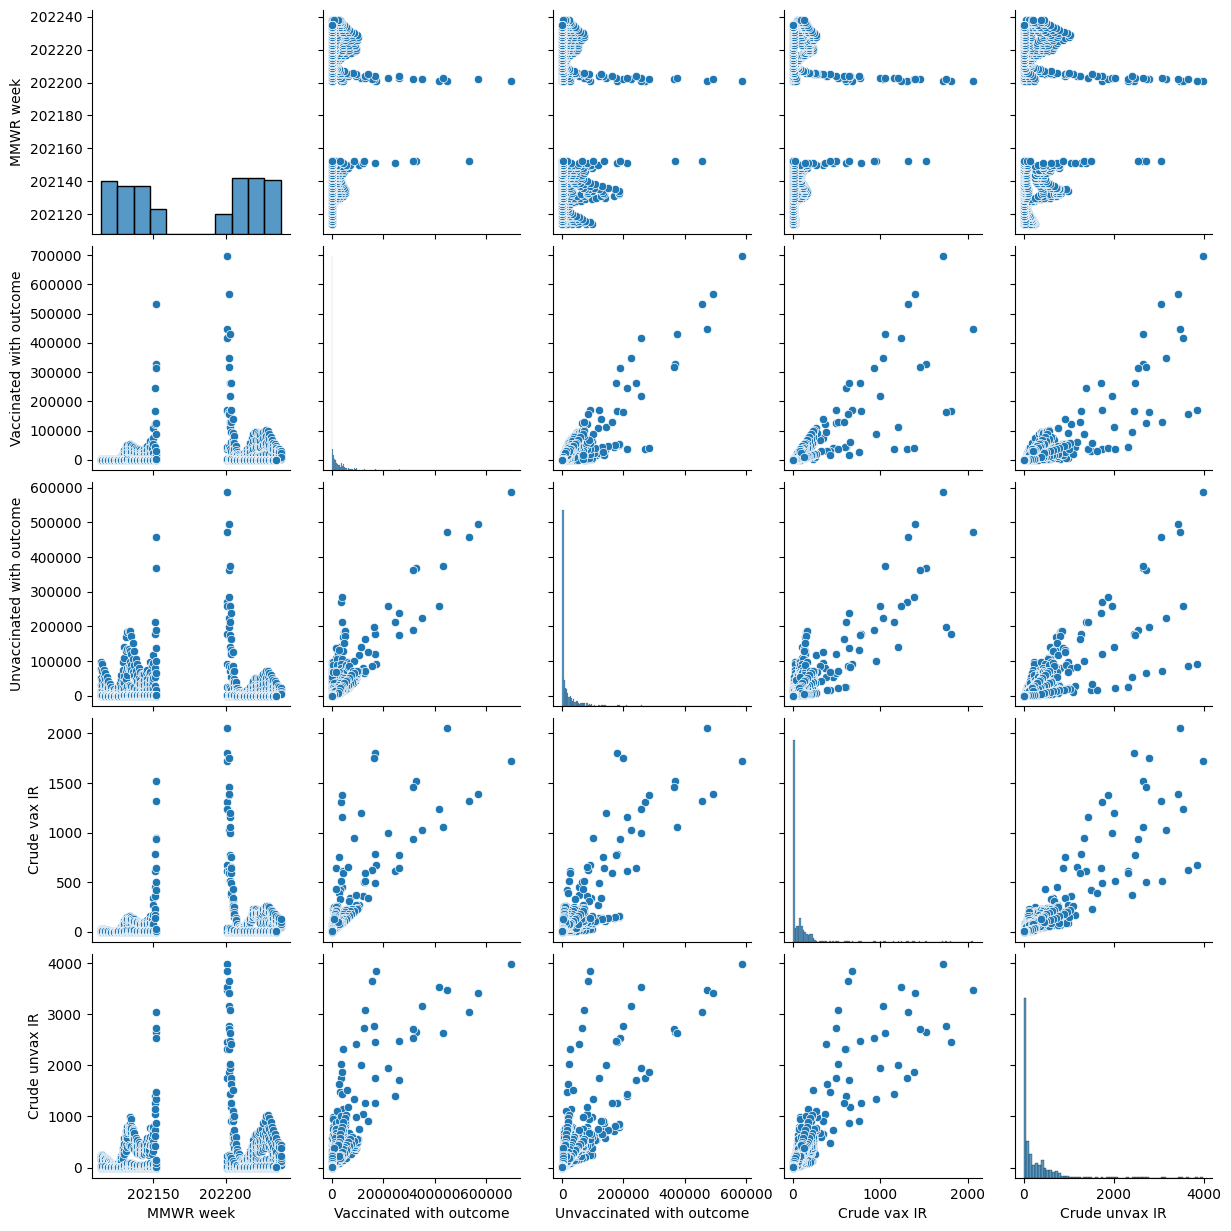

In [ ]:
import seaborn as sns
sns.pairplot(df[['MMWR week', 'Vaccinated with outcome', 'Unvaccinated with outcome', 'Crude vax IR', 'Crude unvax IR']])

We created a sample of pairplots to see if there is a pattern with the variable give to us.

[Text(0.5, 1.0, 'Vaccinated Cases'), (0.0, 250000.0)]

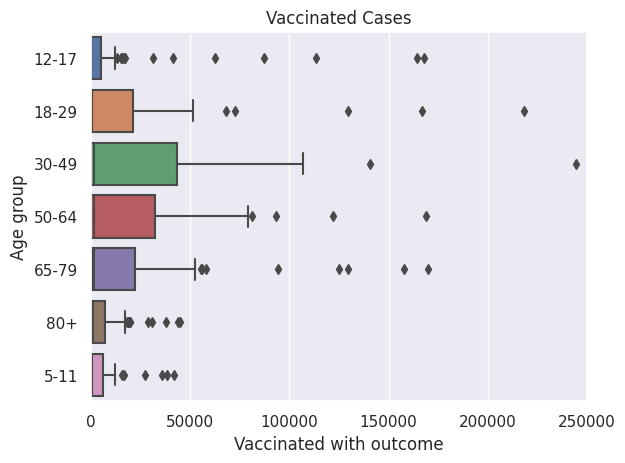

In [ ]:
sns.boxplot(data=df, y=df['Age group'], x=df['Vaccinated with outcome']).set(title = 'Vaccinated Cases', xlim = (0, 250000))

In regards to the vaccinated cases, we created a boxplot in which we saw the variation of the spread of cases based on age.

[Text(0.5, 1.0, 'Unvaccinated Cases'), (0.0, 250000.0)]

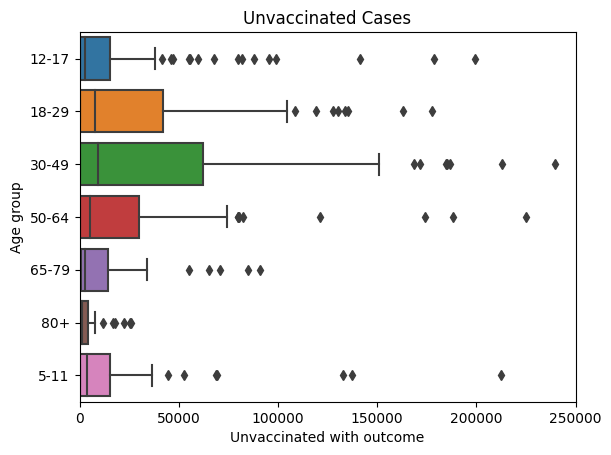

In [ ]:
sns.boxplot(data=df, y=df['Age group'], x=df['Unvaccinated with outcome']).set(title = 'Unvaccinated Cases',xlim = (0, 250000))

In regards to the unvaccinated cases, we created a boxplot in which we saw the variation of the spread of cases based on age.

## Method 1

##T-test on two age groups and number of COVID-19 cases(1st test)
$H_{0}:$ The number of  COVID-19 cases for vaccinated youth and elder are the same.

$H_{a}:$ The number of  COVID-19 cases for vaccinated youth and elder are different.

The reason we chose the T-test for this question was because we wanted to determine whether the vaccine had an affect on the age groups (our population) in which we would compare the means of the youth and the elder.


In [ ]:
youth = ['12-17', '18-29','30-49']
df_youth_case = (df[(df['Age group'].isin(youth)) &  (df['outcome'] == 'case')])
df_youth_case

,outcome,month,MMWR week,Age group,Vaccinated with outcome,Unvaccinated with outcome,Crude vax IR,Crude unvax IR,total outcome
0,case,APR 2021,202114,12-17,8,30785,21.687858,175.348491,30793
1,case,APR 2021,202114,18-29,671,76736,26.385193,246.808299,77407
2,case,APR 2021,202114,30-49,1837,98436,24.729400,239.653115,100273
6,case,APR 2021,202115,12-17,5,30598,9.171115,176.918634,30603
7,case,APR 2021,202115,18-29,744,70484,23.537764,241.461607,71228
...,...,...,...,...,...,...,...,...,...
492,case,SEP 2022,202237,18-29,17356,17365,74.250016,150.143321,34721
493,case,SEP 2022,202237,30-49,35103,24501,82.461788,195.704186,59604
498,case,SEP 2022,202238,12-17,5461,6858,52.394267,109.717204,12319
499,case,SEP 2022,202238,18-29,14576,14410,62.325509,124.800134,28986


In [ ]:
df_youth_case['Age group'].value_counts()

12-17    77
18-29    77
30-49    77
Name: Age group, dtype: int64

[Text(0.5, 1.0, 'Cases for Youth'), (0.0, 150000.0)]

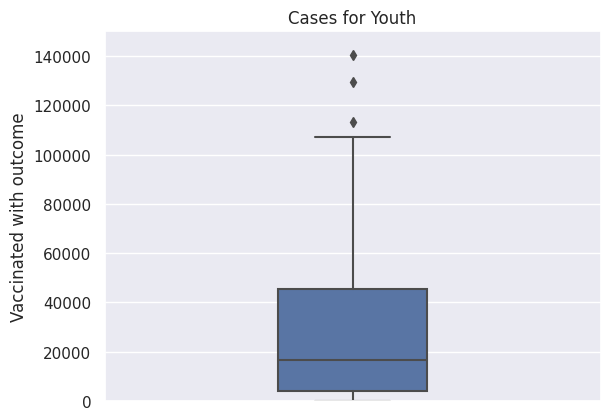

In [ ]:
sns.set(style="darkgrid")
sns.boxplot(data=df_youth_case, y='Vaccinated with outcome', width=0.3).set(title = 'Cases for Youth', ylim=(0,150000))

In [ ]:
elder = ['50-64', '65-79', '80+']
df_elder_case = (df[(df['Age group'].isin(elder)) & (df['outcome'] == 'case')])
df_elder_case.head(10)

,outcome,month,MMWR week,Age group,Vaccinated with outcome,Unvaccinated with outcome,Crude vax IR,Crude unvax IR
3,case,APR 2021,202114,50-64,1547,50324,20.661256,219.290266
4,case,APR 2021,202114,65-79,1655,14880,11.494573,193.852934
5,case,APR 2021,202114,80+,792,3757,15.958209,148.816479
9,case,APR 2021,202115,50-64,1900,45460,19.732268,218.341681
10,case,APR 2021,202115,65-79,1962,14128,11.849814,200.990041
11,case,APR 2021,202115,80+,931,3425,17.207448,143.701008
15,case,APR 2021,202116,50-64,2193,36385,17.538266,188.472145
16,case,APR 2021,202116,65-79,2000,12021,10.988858,183.510888
17,case,APR 2021,202116,80+,902,3003,15.652184,131.936728
21,case,APR 2021,202117,50-64,2313,30221,14.832738,167.472377


In [ ]:
df_elder_case['Age group'].value_counts()

50-64    77
65-79    77
80+      77
Name: Age group, dtype: int64

[Text(0.5, 1.0, 'Cases for Elder'), (0.0, 150000.0)]

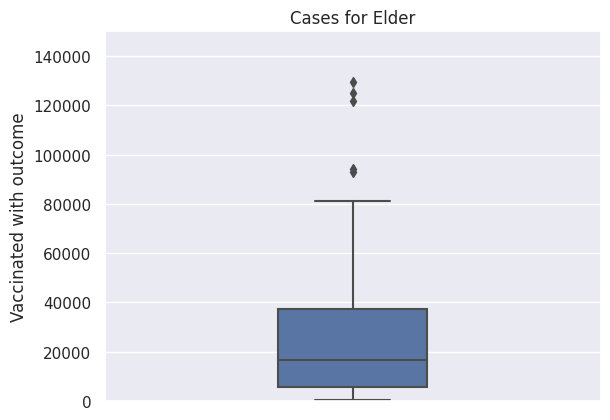

In [ ]:
sns.set(style="darkgrid")
sns.boxplot(data=df_elder_case, y='Vaccinated with outcome',width=0.3).set(title = 'Cases for Elder', ylim=(0,150000))

In [ ]:
#Mean for cases of vaccinated elder
elder_mean = df_elder_case['Vaccinated with outcome'].mean()

#Mean for cases of vaccinated youth
youth_mean = df_youth_case['Vaccinated with outcome'].mean()

print(f'Mean for elder: {round(elder_mean,2)}, for youth: {round(youth_mean,2)}')

Mean for elder: 30469.2, for youth: 44047.29


In [ ]:
from scipy.stats import ttest_rel

results = ttest_rel(df_youth_case['Vaccinated with outcome'], df_elder_case['Vaccinated with outcome'])

p_value = results.pvalue
# p-value:
print(f"P-Value: {p_value}")

# t-statistic:
print(f"T-Statistic: {round(results.statistic,2)}")

P-Value: 0.019417932470213464
T-Statistic: 2.35


In [ ]:
#Compair with alpha level a=0.05
a = 0.05
if p_value < a:
  print('Reject the null.')
else:
    print('Fail to reject the null.')

Reject the null.


###**Result:**  
Since the p-value is less than the alpha level, we have evidence to reject the null. That is, the number of COVID-19 cases for vaccinated youth and elder are not the same. Based on our analysis we can infer that age does indeed have an affect on the effectiveness of the vaccine.

## Method 2

##Correlation on date and number of COVID-19 outcome(2nd test)
$H_{0}:$ There is no correlation between date and outcome of COVID-19.   
$H_{a}:$ There is a correlation between date and outcome of COVID-19.

For this question we decided to use correlation testing to explore if there is a linear association between outcome of COVID-19 cases reported with time, meaning whether as time went by, was the rate of cases changed over the duration of the data reported.

In [ ]:
df['total outcome'] = df['Vaccinated with outcome'] + df['Unvaccinated with outcome']
df_case = (df[(df['MMWR week'] < 202152 + 1) & (df['outcome'] == 'case')])
df_case = df_case[['MMWR week', 'total outcome']]
df_case = df_case.groupby('MMWR week').sum().reset_index()
df_case.head(10)

,MMWR week,total outcome
0,202114,281428
1,202115,263561
2,202116,215251
3,202117,190603
4,202118,155423
5,202119,127981
6,202120,97447
7,202121,72706
8,202122,58157
9,202123,53200


In [ ]:
df_case.describe()

,MMWR week,total outcome
count,39.000000,3.900000e+01
mean,202133.000000,4.047728e+05
std,11.401754,4.586774e+05
min,202114.000000,5.124600e+04
25%,202123.500000,1.730130e+05
50%,202133.000000,2.944480e+05
75%,202142.500000,4.806295e+05
max,202152.000000,2.764292e+06


[Text(0.5, 1.0, 'Covid-19 Cases in Year 2021')]

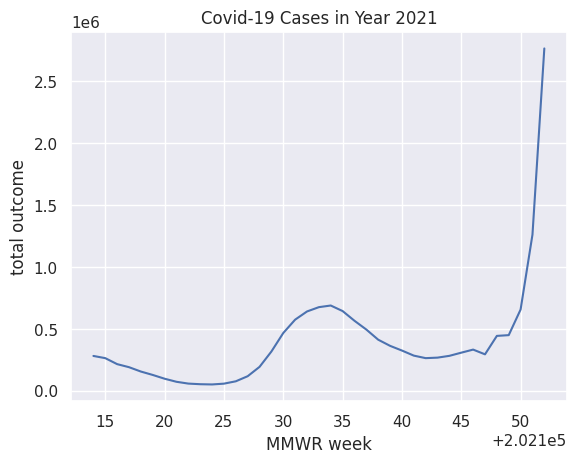

In [ ]:
sns.lineplot(data=df_case, x='MMWR week', y='total outcome').set(title = 'Covid-19 Cases in Year 2021')

In [ ]:
import numpy as np
q1 = np.percentile(df_case['total outcome'], 25)
q3 = np.percentile(df_case['total outcome'], 75)
iqr = q3 -q1

outlier_lower =  q1 - 1.5 * iqr
outlier_upper =  q3 + 1.5 * iqr

print(f'Below {outlier_lower} or above {outlier_upper} is the outlier')


Below -288411.75 or above 942054.25 is the outlier


In [ ]:
#Remove outlier from the table
df_case_cleaned = df_case[df_case['total outcome'] < outlier_upper]

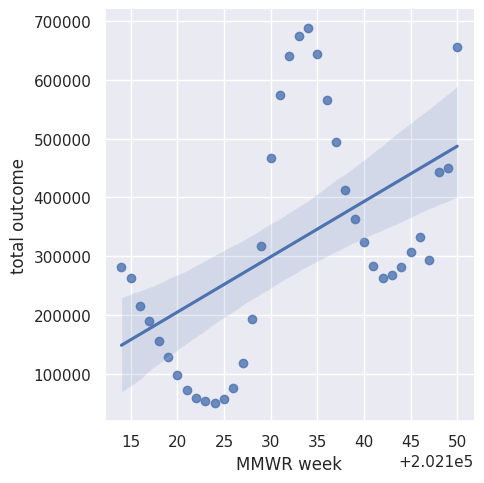

In [ ]:
import seaborn as sns
sns.lmplot(data=df_case_cleaned, x='MMWR week', y='total outcome')

In [ ]:
import numpy as np
from scipy import stats
pearson_corr, p_value  = stats.pearsonr(x = df_case_cleaned['MMWR week'] , y = df_case_cleaned['total outcome'] )
print(f'The Pearson correlation coeffient is {round(pearson_corr,2)}')
print(f'The p-value is {p_value}')

The Pearson correlation coeffient is 0.51
The p-value is 0.0011572642956674093


In [ ]:
alpha_level = 0.05
if p_value < alpha_level:
  print('Reject the null')
else:
  print('Fail to reject the null')

Reject the null


### **Result**:   
Since the p-value is less than alpha level, we have enough evidence to reject the null. That is, there is a significant relationship between date and outcome of COVID-19. The pearson correlation coeffient is also above 0, which means that there is a postive relationship between date and outcome of COVID-19. Based on our findings, we concluded that there is an association of reported cases of COVID-19 and time. Thus, we noted that there was a psottive correlation. We interpreted this as the time goes by, there are more cases reported based on the period examined.

## Conclusion
If more time was permitted, we would have liked to see if there was a correlation between age and death/cases. We found that the number of cases varied depending on age. In regards to our second question we found that there is a positive correlation with cases based on a combitation of both vaccinated and unvaccinated cases. This was an interesting result because we believed that as time went by, we assumed that the cases would decrease due to vaccination. It would have been nice to futher explore this database. This group project allowed us to work and implimiant social skills together, planning ahead, and figure out and work together as a team to solve our issue. Even though the processes was stressful and end results were rewarding.